# COVID Project

## 데이터 분석 처리 절차
 - 문제의 정의
 - 데이터 수집
 - 데이터 전처리 및 가공
 - 데이터 시각화 및 통찰 도출
 

# 문제의 정의
 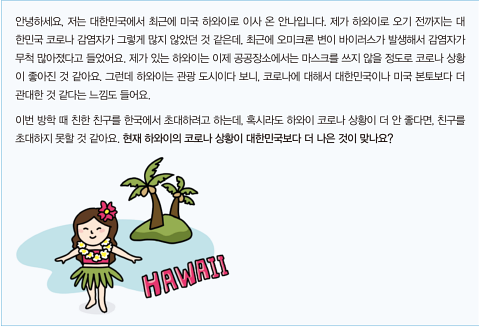

## 기대 결과
- 대한민국과 하와이의 확진자 현황을 보여주는 그래프 생성
- 일자별 총 인구 대비 확진자 수 비율의 변화 추이

# 데이터 수집

## 적절한 데이터 인가?
- 포괄성 : 필요한 데이터를 포함하고 있는가?
- 최신성 : 최신 데이터를 포함하고 있는가?
- 정확성 : 정확한 데이터를 포함하고 있는가?
- 일관성 : 데이터의 형태가 일관되어 있는가?
- 신뢰성 : 왜곡이 없고 신뢰할 수 있는 데이터 인가?
- 사용성 : 사용하기 편리한가?

## 데이터의 검색 및 다운로드
- Google에서 OWID(Our World in Data, https://ourworldindata.org/ )검색
- Main page의 상단 Explore Our COVID-19 Data
- 왼쪽 상단 COVID-19 dataset 클릭
- Github, README.md 파일에 Download our complete COVID-19 dataset에서 CSV 클릭
- owid-covid-data.csv 


# 데이터 전처리 및 가공

## 데이터 읽어 오기

In [ ]:
import pandas as pd

pd.show_versions()

In [ ]:
#Google Drive에 연결 : 왼쪽 폴더 이미지 클릭 

!pwd

In [ ]:
# CSV파일 읽어 오기
# 읽어 오려는 파일 오른쪽 클릭해서 '경로복사'

raw_df = pd.read_csv('/content/drive/MyDrive/02_Lecture/01_OSS_DataAnalysis/Chap03/owid-covid-data.csv')

raw_df.info()

In [ ]:
raw_df.head()

In [ ]:
raw_df.tail()

## 원하는 열 추려내기

### 열 항목 확인 및 수정된 데이터 프레임 생성
- iso_code : 국제 표준 국가 코드
- location : 국가 이름
- date : 일자
- total_cases : 전체 확진자 수
- population : 인구

In [ ]:
#원하는 열 list만들기 (df : data frame)
selected_columns = ['iso_code', 'location', 'date', 'total_cases', 'population']

#원하는 열을 추출한 데이터프레임 생성
revised_df = raw_df[selected_columns]

#수정된 데이터프레임 확인
revised_df.head()

### 유일한 데이터 추출

- Method : unique()

In [ ]:
# location 열 추출
location = raw_df['location']
location

In [ ]:
#location열의 유일한 값 확인
location.unique()

In [ ]:
kor_total_df = raw_df[raw_df.location=='South Korea']
kor_total_df.head()

In [ ]:
## South Korea 데이터 프레임 생성

kor_df = revised_df[revised_df.location=='South Korea']

kor_df.head()

In [ ]:
## United States 데이터 프레임 생성

usa_df = revised_df[revised_df.location=='United States']

usa_df.head()

### index 변경
- Method : set_index()

In [ ]:
# date로 index변경

kor_date_index_df = kor_df.set_index('date')
usa_date_index_df = usa_df.set_index('date')


In [ ]:
kor_date_index_df.head()

In [ ]:
usa_date_index_df.head()

# 데이터 시각화
- Pandas chart visualization 참조
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


In [ ]:
# 그래프 작성 예

df = pd.DataFrame({
    'pig' : [20, 18, 489, 675, 1776],
    'horse' : [4, 25, 281, 600, 1900],
    }, index=[1990, 1997, 2003, 2009, 2014])

lines = df.plot.line()

In [ ]:
kor_total_cases = kor_date_index_df['total_cases']
kor_total_cases

In [ ]:
usa_total_cases = usa_date_index_df['total_cases']
usa_total_cases

In [ ]:
final_df = pd.DataFrame({
    'KOR' : kor_total_cases,
    'USA' : usa_total_cases
    }, index=kor_date_index_df.index)

final_df.head()

In [ ]:
# .plot.line() 함수를 이용해서 선 그래프 그리기
final_df.plot.line()

In [ ]:
#원하는 X축의 범쉬 설정 : 슬라이싱
final_df['2022-01-01':].plot.line()

In [ ]:
# X축에 각도 넣기
final_df['2022-01-01':].plot.line(rot=45)

## 확진자 비율 구하기

In [ ]:
kor_population = kor_date_index_df['population']['2020-01-22']

usa_population = usa_date_index_df['population']['2020-01-22']

print('미국 인구(', usa_population, ') / 대한민국 인구(', kor_population, ')')

In [ ]:
# 인구비율 구하기

rate = round((usa_population/kor_population), 2)
rate

In [ ]:
#확진자 비율을 적용한 최종 데이터 프레임 생성

final_revised_df = pd.DataFrame({
    'KOR' : kor_total_cases * rate,
    'USA' : usa_total_cases
    }, index=kor_date_index_df.index)

final_revised_df.head()

In [ ]:
final_revised_df[:].plot.line(rot=45)

In [ ]:
final_revised_df['2020-01-01':].plot.line(rot=45)

# 과제

1. 본인이 문제를 2개를 만들어서 각 문제에 대한 설명 및 코드 작성